# Assignment 1: Wrangling and EDA
### Foundations of Machine Learning

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `airbnb_NYC.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing? For the remaining missing values, replace the `np.nan/None` values with the label `Missing`.
3. Dummy variable: For `metabric.csv`, convert the `Overall Survival Status` variable into a dummy/binary variable, taking the value 0 if the patient is deceased and 1 if they are living.
4. Missing values: For `airbnb_NYC.csv`, determine how many missing values of `Review Scores Rating` there are. Create a new variable, in which you impute the median score for non-missing observations to the missing ones. Why might this bias or otherwise negatively impact your results?

In [118]:
! git clone https://github.com/zayliet/scratchpad
%run ./scratchpad/get_data.py

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

fatal: destination path 'scratchpad' already exists and is not an empty directory.


<Figure size 640x480 with 0 Axes>

Q1 1. To clean the data, I replaced all commas with an empty string so the column only contains numerical values. I then converted the Price column from objects to numerical values while coercing missing values to NaN to be able to count how many missing entries there were. There were 0 missing values.

In [119]:
airbnb = pd.read_csv('/content/data/airbnb_NYC.csv', encoding='latin1')

airbnb.head
airbnb['Price'] = airbnb['Price'].str.replace(',', '')
airbnb['Price'] = pd.to_numeric(airbnb['Price'], errors='coerce')
airbnb['Price'].unique()

price_missing = airbnb["Price"].isna().sum()
price_missing

np.int64(0)

Q1 2. 76% of the values are missing. The data is missing 100% of the time when the type of forced used was maximal restraint techinique or less lethal. Chemical irritants also had 87.9% of the data missing.

In [120]:
police = pd.read_csv('/content/data/mn_police_use_of_force.csv', encoding='latin1')

police.head()
police['subject_injury'].unique()
police["subject_injury"].isna().mean()
pd.crosstab(police['force_type'], police['subject_injury'], dropna=False)
police['subject_injury'] = police['subject_injury'].fillna('Missing')
police['subject_injury'].unique()

array(['Missing', 'No', 'Yes'], dtype=object)

Q1 3.

In [121]:
metabric = pd.read_csv('/content/data/metabric.csv', encoding='latin1')

metabric.head()
metabric['Overall Survival Status'].unique()
metabric['Overall Survival Status'] = metabric['Overall Survival Status'].map({'1:DECEASED': 0, '0:LIVING': 1})
metabric['Overall Survival Status'].unique()

array([1, 0])

Q1 4. There are 8323 missing values. Median imputation can bias results toward the center, reduce variance artificially, and affect correlations. These would negatively affect results because I may find patterns that do not actually match what the real data is saying.

In [122]:
missing = airbnb["Review Scores Rating"].isna().sum()
median = airbnb["Review Scores Rating"].median()
airbnb['Rating Imp'] = airbnb['Review Scores Rating'].fillna(median)
airbnb

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating,Rating Imp
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN,94.0
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN,94.0
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN,94.0
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN,94.0
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0,96.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30473,43022976,8/31/2015,10 Mins to Time Square/two floors,Queens,Apartment,NaN,Entire home/apt,11101.0,5.0,1,0,300,NaN,94.0
30474,42993382,8/31/2015,"1BR ocean view & F,Q train st",Brooklyn,Apartment,NaN,Private room,11224.0,2.0,1,0,125,NaN,94.0
30475,43033067,8/31/2015,Amazing Private Room,Brooklyn,Other,NaN,Private room,11206.0,1.0,1,0,80,NaN,94.0
30476,43000991,8/31/2015,Charming private female room: UWS,Manhattan,Apartment,NaN,Private room,10025.0,1.0,1,0,35,NaN,94.0


**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work. What does work?
2. Drop any columns that do not contain data.
3. What is an observation? Carefully justify your answer, and explain how it affects your choices in cleaning and analyzing the data.
4. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
5. Clean the Age variable and make a histogram of the ages of the victims.
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Thoughts?

Q2 1. pd.read_excel() works

In [123]:
sharks = pd.read_excel("GSAF5.xls")

Q2 2.

In [124]:
sharks.head()
sharks.dtypes
sharks = sharks.dropna(axis=1, how="all")

Q2 3. An observation is the person, place, or thing being considered. In this case, an observation is a shark attack. Each row represents one shark attack and the details of the incident. Cleaning should ensure that each row of data still makes sense on its own.

Q2 4. Attacks are increasing over time.

<Axes: xlabel='Year'>

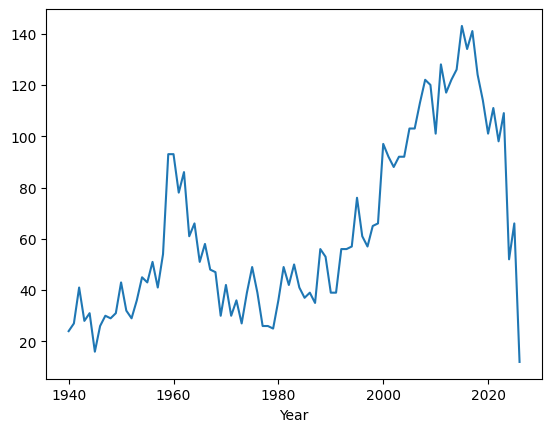

In [125]:
sharks["Year"] = pd.to_numeric(sharks["Year"], errors="coerce")
sharks["Year"].describe()
sharks_recent = sharks[sharks["Year"] >= 1940]
sharks_recent['Year'].value_counts().sort_index().plot()

Q2 5.

<Axes: >

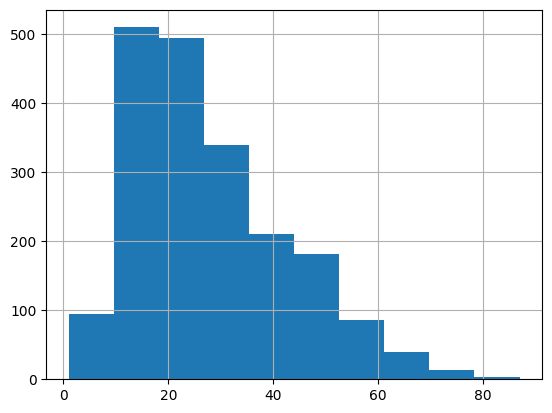

In [126]:
sharks['Age'] = sharks['Age'].str.extract(r'(\d+)')
sharks['Age'] = pd.to_numeric(sharks["Age"], errors="coerce")
sharks['Age'].unique()
sharks['Age'].hist()

Q2 6. 74% of shark attacks are unprovoked.



In [129]:
sharks['Type'] = sharks['Type'].str.strip()

def clean_type(x):
  if x != 'Provoked' and x != 'Unprovoked':
    return 'Unknown'
  return x

sharks['Type'] = sharks['Type'].apply(clean_type)
sharks['Type'].unique()
mean = (sharks['Type'] == 'Unprovoked').mean()
mean

np.float64(0.738620299689002)

Q2 7.

In [133]:
sharks['Fatal Y/N'] = sharks['Fatal Y/N'].str.lower()

def clean_fatal(x):
  if x == 'y':
    return 'Y'
  elif x == 'n':
    return 'N'
  else:
    return 'Unknown'

sharks['Fatal Y/N'] = sharks['Fatal Y/N'].apply(clean_fatal)
sharks['Fatal Y/N'].unique()

array(['Y', 'N', 'Unknown'], dtype=object)

Q2 8. The attack is more likely to be fatal when unprovoked. This could be because unprovoked sharks are so hungry they are willing to eat humans.

In [134]:
pd.crosstab(sharks['Fatal Y/N'], sharks['Type'])

Type,provoked,unknown,unprovoked
Fatal Y/N,,,
N,612,450,3872
Unknown,11,555,85
Y,21,200,1268


**Q3.** Open the "tidy_data.pdf" document available in `https://github.com/ds4e/wrangling`, which is a paper called *Tidy Data* by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?

**Q3 Answers**
1. This paper is about tidy datasets having a consistent structure so that only a small set of tools is needed.
2. The "tidy data standard" is intended to create a framework for tidy datasets so that tidy tools can be used on them.
3. Tidy datasets follow a standard structure, but messy datasets all have their own specific reasons why they are messy. It is easy to identify an observation as a row and variables as columns in a dataset, however, it is difficult to determine how to describe variables precisely such as home phone/work phone versus phone number/number type.
4. A value is either a number (quantitative) or string (qualitative). A variable contains all values that measure the same underlying attribute (height, temperature, duration). An observation is contains all values measured under the same unit (a person, day, or race).
5. Tidy data is defined as a standard way of mapping the meaning of a dataset to its structure. Each variable forms a column, each observation forms a row, and each type of observational unit forms a table.
6. The five most common problems with messy datasets are column headers being values instead of variables, multiple variables stores in one column, variables stored in both rows and columns, multiple types of observational units stored in one table, and a single observational unit is stored in multiple tables. Table 4 is messy because frequency is a variable, yet it is being stores as values. Melting a dataset is turning columns into rows
7. Table 11 is messy because the date variale is spread across multiple columns (day, month, year), while the tmin and tmax variables are treated as values instead of columns. Table 12 is molten because tmin, tmax, and date are the new condensed columns that allow you to look at the data easily without so many missing values.

**Q4.** This question looks at financial transfers from international actors to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going?

For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
5. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions.
6. Which giftors provide the most money, in total?

Q4 1.

In [135]:
gifts = pd.read_csv('/content/data/ForeignGifts_edu.csv', encoding='latin1')

Q4 2. The plot is very heavily right-skewed, meaning there are many small donations, but also a few very large donations that bring the mean much higher than the median.

array([ 250000,  463657, 3649107, ..., 1064580,  737375, 1024469])

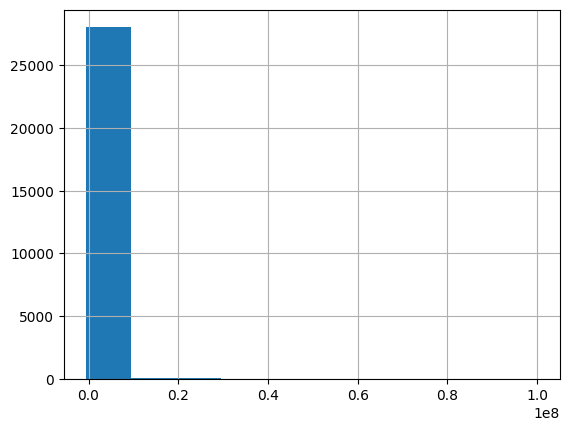

In [167]:
gifts['Foreign Gift Amount'].describe()
gifts['Foreign Gift Amount'].hist()
gifts['Foreign Gift Amount'].unique()

Q4 3. 61.21% Contract, 38.75% Monetary Gift, 0.04% Real Estate

In [155]:
gifts['Gift Type'].value_counts()
contract_mean = (gifts['Gift Type'] == 'Contract').mean()
monetary_mean = (gifts['Gift Type'] == 'Monetary Gift').mean()
realestate_mean = (gifts['Gift Type'] == 'Real Estate').mean()

Q4 4.

In [162]:
gifts['Foreign Gift Amount'] = pd.to_numeric(gifts['Foreign Gift Amount'], errors='coerce')
# by total amount of donations
gifts.groupby('Country of Giftor')['Foreign Gift Amount'].sum().sort_values(ascending=False).head(15)
# by number of donations
gifts.groupby('Country of Giftor')['Foreign Gift Amount'].count().sort_values(ascending=False).head(15)

,Foreign Gift Amount
Country of Giftor,
ENGLAND,3655
CHINA,2461
CANADA,2344
JAPAN,1896
SWITZERLAND,1676
SAUDI ARABIA,1610
FRANCE,1437
GERMANY,1394
HONG KONG,1080


Q4 5.

<Axes: >

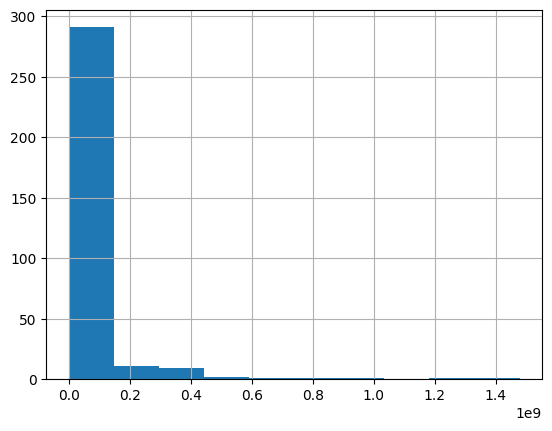

In [165]:
gifts.groupby('Institution Name')['Foreign Gift Amount'].sum().sort_values(ascending=False).head(15)
gifts.groupby('Institution Name')['Foreign Gift Amount'].sum().hist()

Q4 6.

In [176]:
gifts.groupby('Giftor Name')['Foreign Gift Amount'].sum().sort_values(ascending=False).head(5)

,Foreign Gift Amount
Giftor Name,
Qatar Foundation,1166503744
Qatar Foundation/Qatar National Res,796197000
Qatar Foundation for Education,373945215
Anonymous,338793629
Saudi Arabian Cultural Mission,275221475


**Q5.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `college_completion.csv` dataset from the US Department of Education. The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `college_completion.csv` data with Pandas.
2. How many observations and variables are in the data? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see in words.
4. For `grad_100_value`, create a kernel density plot and describe table. Now condition on `control`, and produce a kernel density plot and describe tables for each type of institutional control. Which type of institution appear to have the most favorable graduation rates?
5. Make a scatterplot of `grad_100_value` by `aid_value`, and compute the covariance and correlation between the two variables. Describe what you see. Now make the same plot and statistics, but conditioning on `control`. Describe what you see. For which kinds of institutions does aid seem to vary positively with graduation rates?

Q5 1.

In [177]:
college = pd.read_csv('/content/data/college_completion.csv', encoding='latin1')

Q5 2. 3798 Observations (rows), 63 variables

In [183]:
college.shape
college.head()

,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0


Q5 3. Private not-for-profit tend to be 4-year level, while private for-profit and public have a more even split.

In [184]:
pd.crosstab(college['control'], college['level'])

level,2-year,4-year
control,,
Private for-profit,465,527
Private not-for-profit,68,1180
Public,926,632


Q5 4. Private not-for-profit appears to have the most favorable graduation rates.

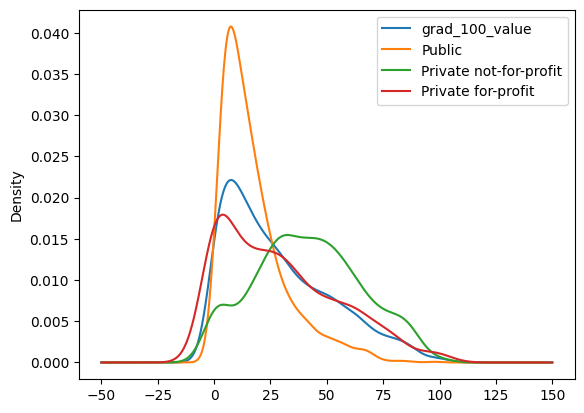

In [199]:
college['grad_100_value'].plot.kde()

for c in college["control"].unique():
    college[college["control"] == c]["grad_100_value"].plot(kind="kde", label=c)

plt.legend()

**Q6.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

We're going to look at **linear transformations** of $X$, $Y = a + bX$. So we take each value of $X$, $x_i$, and transform it as $y_i = a + b x_i$.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $ \text{cov}(X,X) = s^2$.
3. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
4. Show that $\text{cov}(a+bX,a+bY) = b^2 \text{cov}(X,Y) $. Notice, this also means that $\text{cov}(bX, bX) = b^2 s^2$.
5. Suppose $b>0$ and let the median of $X$ be $\text{med}(X)$. Is it true that the median of $a+bX$ is equal to $a + b \times \text{med}(X)$? Is the IQR of $a + bX$ equal to $a + b \times \text{IQR}(X)$?
6. Show by example that the means of $X^2$ and $\sqrt{X}$ are generally not $(m(X))^2$ and $\sqrt{m(X)}$. So, the results we derived above really depend on the linearity of the transformation $Y = a + bX$, and transformations like $Y = X^2$ or $Y = \sqrt{X}$ will not behave in a similar way.

**Q7.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `ames_prices.csv` dataset. The "relevant" variables for this question are:
  - `price` - Sale price value of the house
  - `Bldg.Type` - Building type of the house (single family home, end-of-unit townhome, duplex, interior townhome, two-family conversion)

1. Load the `college_completion.csv` data with Pandas.
2. Make a kernel density plot of price and compute a describe table. Now, make a kernel density plot of price conditional on building type, and use `.groupby()` to make a describe type for each type of building. Which building types are the most expensive, on average? Which have the highest variance in transaction prices?
3. Make an ECDF plot of price, and compute the sample minimum, .25 quantile, median, .75 quantile, and sample maximum (i.e. a 5-number summary).
4. Make a boxplot of price. Are there outliers? Make a boxplot of price conditional on building type. What patterns do you see?
5. Make a dummy variable indicating that an observation is an outlier.
6. Winsorize the price variable, and compute a new kernel density plot and describe table. How do the results change?